## 1. scikit-learn 中的决策树

### 1.1 二维特征显示决策树

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

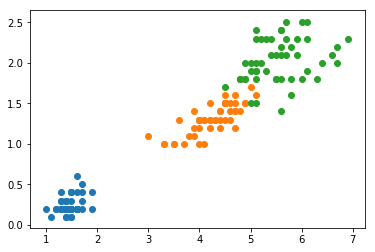

In [2]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [3]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [4]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

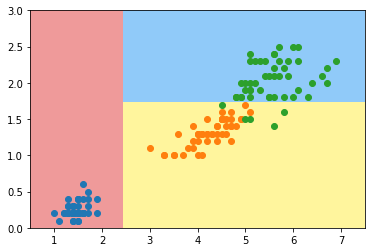

In [5]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### 1.2 CART中的分类树

In [6]:
# encoding=utf-8
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris=load_iris()
features = iris.data
labels = iris.target
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=0)

clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(train_features, train_labels)
test_predict = clf_gini.predict(test_features)
score = accuracy_score(test_labels, test_predict)
print("CART 分类树准确率 %.4lf" % score)

CART 分类树准确率 0.9800


### 1.3 CART中的回归树

In [7]:
# encoding=utf-8
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor

boston=load_boston()
print(boston.feature_names)
features = boston.data
prices = boston.target
train_features, test_features, train_price, test_price = train_test_split(features, prices, test_size=0.33)
dtr=DecisionTreeRegressor()
dtr.fit(train_features, train_price)
predict_price = dtr.predict(test_features)
print('回归树二乘偏差均值:', mean_squared_error(test_price, predict_price))
print('回归树绝对值偏差均值:', mean_absolute_error(test_price, predict_price)) 

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
回归树二乘偏差均值: 21.870538922155685
回归树绝对值偏差均值: 2.8455089820359283


### 1.4 CART决策树剪枝

### 1.5 sklearn中使用决策树的一般流程

In [8]:
import pandas as pd
train_data = pd.read_csv('./titanic-data/train.csv')
test_data = pd.read_csv('./titanic-data/test.csv')
# 1. 数据探索
print('-'*30, 'info()')
print(train_data.info())
print('-'*30, 'descirbe()')
print(train_data.describe())
print('-'*30, 'describe(include=["0"])')
print(train_data.describe(include=['O']))
print('-'*30)
print(train_data.head())
print('-'*30)
print(train_data.tail())

------------------------------ info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
------------------------------ descirbe()
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.42

In [9]:
# 2. 数据清洗
# 使用平均年龄来填充年龄中的 nan 值
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
# 使用票价的均值填充票价中的 nan 值
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
# 使用登录最多的港口来填充登录港口的 nan 值
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S',inplace=True)

In [10]:
# 3. 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
train_labels = train_data['Survived']
test_features = test_data[features]

from sklearn.feature_extraction import DictVectorizer
dvec=DictVectorizer(sparse=False)
print(train_features.head())
train_features=dvec.fit_transform(train_features.to_dict(orient='record'))
# train_features变为10个特征值(sex两个值变为两列，embarked三个值变为三列，oneHot)，891个样本
print('**'*30)
print(train_features[:5])

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S
************************************************************
[[22.      0.      0.      1.      7.25    0.      3.      0.      1.
   1.    ]
 [38.      1.      0.      0.     71.2833  0.      1.      1.      0.
   1.    ]
 [26.      0.      0.      1.      7.925   0.      3.      1.      0.
   0.    ]
 [35.      0.      0.      1.     53.1     0.      1.      1.      0.
   1.    ]
 [35.      0.      0.      1.      8.05    0.      3.      0.      1.
   0.    ]]


In [11]:
# 4. 决策树模型
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')# 构造 ID3 决策树
clf.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
# 5. 模型预测，评估
test_features=dvec.transform(test_features.to_dict(orient='record'))
pred_labels = clf.predict(test_features)
# 得到决策树准确率
acc_decision_tree = round(clf.score(train_features, train_labels), 6)
print(u'score 准确率为 %.4lf' % acc_decision_tree)

score 准确率为 0.9820


In [66]:
import numpy as np
from sklearn.model_selection import cross_val_score
# 使用 K 折交叉验证 统计决策树准确率
print(u'cross_val_score 准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels, cv=10)))

cross_val_score 准确率为 0.7746


In [67]:
# 6. 决策树模型可视化
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
# graph.render("tree")
graph.view('graphviz_test')

'graphviz_test.pdf'

## 2. 使用信息熵寻找最优划分

In [15]:
# 二分类
def entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

In [16]:
x = np.linspace(0.01, 0.99, 200)

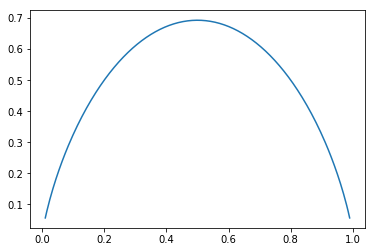

In [17]:
plt.plot(x, entropy(x))
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

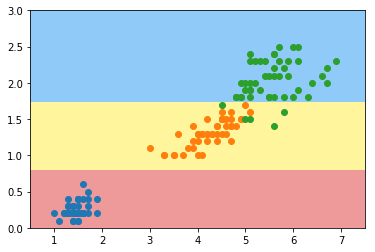

In [19]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### 2.1 模拟使用信息熵进行划分

In [20]:
def split(X, y, d, value):
    ''' 对第几个特征纬度 d, 以什么阈值value进行划分'''
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [21]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res
        
def try_split(X, y):
    
    best_entropy = float('inf')
    best_dimension, best_value = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_left, X_right, y_left, y_right = split(X, y, d, v)
                p_left, p_right = len(X_left) / len(X), len(X_right) / len(X)
                e = p_left * entropy(y_left) + p_right * entropy(y_right)
                if e < best_entropy:
                    best_entropy, best_dimension, best_value = e, d, v
    return best_entropy, best_dimension, best_value

In [22]:
best_entropy, best_d, best_v = try_split(X, y)
print("best_entropy =", best_entropy)
print("best_dimension =", best_d)
print("best_value =", best_v)

best_entropy = 0.46209812037329684
best_dimension = 0
best_value = 2.45


In [23]:
X1_left, X1_right, y1_left, y1_right = split(X, y, best_d, best_v)

In [24]:
entropy(y1_left)

0.0

In [25]:
entropy(y1_right)

0.6931471805599453

In [26]:
best_entropy2, best_d2, best_v2 = try_split(X1_right, y1_right)
print("best_entropy =", best_entropy2)
print("best_dimension =", best_d2)
print("best_value =", best_v2)

best_entropy = 0.2147644654371359
best_dimension = 1
best_value = 1.75


In [27]:
X2_left, X2_right, y2_left, y2_right = split(X1_right, y1_right, best_d2, best_v2)

In [28]:
entropy(y2_left)

0.30849545083110386

In [29]:
entropy(y2_right)

0.10473243910508653

## 3. 使用基尼系数寻找最优划分

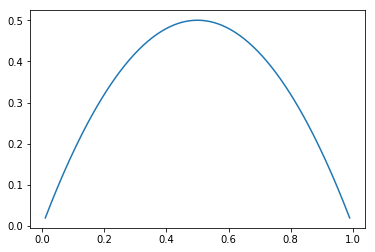

In [30]:
# 二分类
def Gini(p):
    return -2 * p**2 + 2 * p

x = np.linspace(0.01, 0.99, 200)
plt.plot(x, Gini(x))
plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="gini")
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

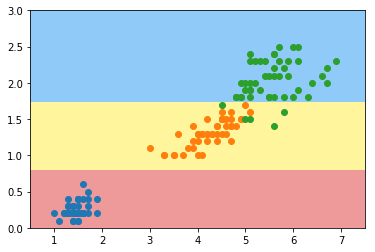

In [32]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### 3.1 模拟使用基尼系数进行划分

In [33]:
def split(X, y, dimension, value):
    ''' 对第几个特征纬度 d, 以什么阈值value进行划分'''
    index_a = (X[:,dimension] <= value)
    index_b = (X[:,dimension] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

from collections import Counter
from math import log

def gini(y):
    counter = Counter(y)
    res = 1.
    for num in counter.values():
        p = num / len(y)
        res -= p**2
    return res
        
def try_split(X, y):
    best_gini, best_dimension, best_value = float('inf'), -1, -1
    for dimension in range(X.shape[1]):
        sorted_index = np.argsort(X[:,dimension])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], dimension] != X[sorted_index[i], dimension]:
                value = (X[sorted_index[i-1], dimension] + X[sorted_index[i], dimension]) / 2
                X_left, X_right, y_left, y_right = split(X, y, dimension, value)
                p_left, p_right = len(X_left) / len(X), len(X_right) / len(X)
                g = p_left * gini(y_left) + p_right * gini(y_right)
                if g < best_gini:
                    best_gini, best_dimension, best_value = g, dimension, value
    return best_gini, best_dimension, best_value

In [34]:
best_g, best_d, best_v = try_split(X, y)
print("best_g = ", best_g)
print("best_d = ", best_d)
print("best_v = ", best_v)

best_g =  0.3333333333333333
best_d =  0
best_v =  2.45


In [35]:
X1_left, X1_right, y1_left, y1_right = split(X, y, best_d, best_v)

In [36]:
gini(y1_left)

0.0

In [37]:
gini(y1_right)

0.5

In [38]:
best_g2, best_d2, best_v2 = try_split(X1_right, y1_right)
print("best_g2 = ", best_g2)
print("best_d2 = ", best_d2)
print("best_v2 = ", best_v2)

best_g2 =  0.1103059581320451
best_d2 =  1
best_v2 =  1.75


In [39]:
X2_left, X2_right, y2_left, y2_right = split(X1_right, y1_right, best_d2, best_v2)

In [40]:
gini(y2_left)

0.1680384087791495

In [41]:
gini(y2_right)

0.04253308128544431

## 4. 信息熵 vs 基尼系数
- 熵信息计算比基尼系数稍微慢
- scikit-learn中默认为基尼系数
- 大多数时候两者没有特别的效果优劣

## 5. CART(Classification And Regression Tree)

- scikit-learn的决策树是实现:CART
- ID3, C4.5, C5.0
- 非参数学习算法容易过拟合 -> 降低复杂度（剪枝）

In [42]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
X, y = datasets.make_moons(noise=0.25, random_state=666)

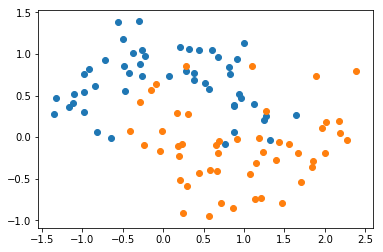

In [43]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

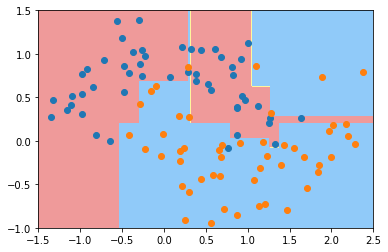

In [45]:
plot_decision_boundary(dt_clf, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

- 明显过拟合耶！！！

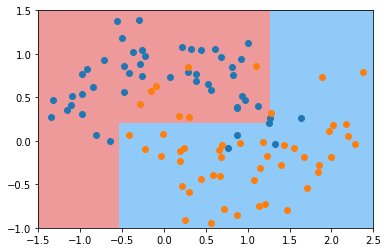

In [46]:
# 1. 限制树深度
dt_clf2 = DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(X, y)
plot_decision_boundary(dt_clf2, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

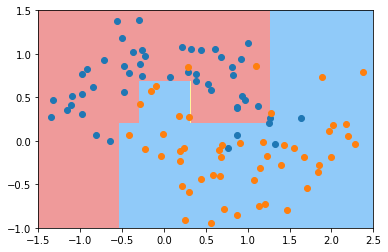

In [47]:
# 2. 最少有10个节点再对树进行分支
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)
dt_clf3.fit(X, y)
plot_decision_boundary(dt_clf3, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

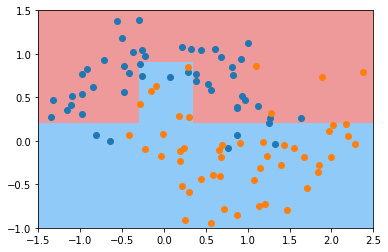

In [48]:
# 3. 对于一个叶子节点最少要有6个数据样本
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)
dt_clf4.fit(X, y)
plot_decision_boundary(dt_clf4, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

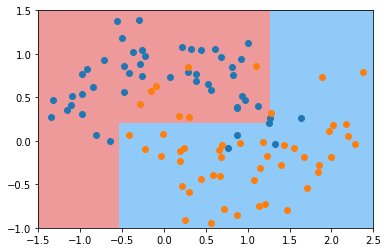

In [49]:
# 4. 限制叶子节点最多为4个
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4)
dt_clf5.fit(X, y)
plot_decision_boundary(dt_clf5, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [50]:
# 5. 其他 min_weight_fraction_leaf, min_features

## 6. 决策树解决回归问题

In [51]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [52]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [53]:
dt_reg.score(X_test, y_test) #R-square

0.5985534110794017

In [54]:
dt_reg.score(X_train, y_train) #R-square

1.0

In [55]:
dt_reg1 = DecisionTreeRegressor(max_depth=2)
dt_reg1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [56]:
dt_reg1.score(X_test, y_test) #R-square

0.556322606511538

In [57]:
dt_reg1.score(X_train, y_train) #R-square

0.7133089319648489

## 7. 决策树的局限性

- 生成的决策边界是横平竖直的
- 非参数学习方法，对个别参数很敏感

In [58]:
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

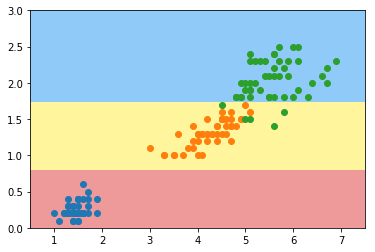

In [59]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
tree_clf.fit(X, y)
plot_decision_boundary(tree_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [60]:
X_new = np.delete(X, 138, axis=0)
y_new = np.delete(y, 138)
print(X.shape, y.shape)
print(X_new.shape, y_new.shape)

(150, 2) (150,)
(149, 2) (149,)


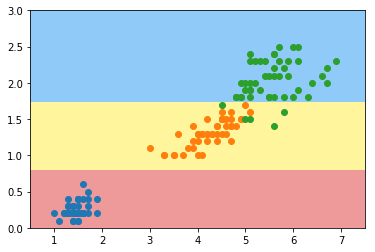

In [61]:
tree_clf2 = DecisionTreeClassifier(max_depth=2, criterion="entropy")
tree_clf2.fit(X_new, y_new)
plot_decision_boundary(tree_clf2, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()